<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Платформы-лидеры-по-продажам" data-toc-modified-id="Платформы-лидеры-по-продажам-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Платформы-лидеры по продажам</a></span></li><li><span><a href="#Влияние-на-продажи-оценок-пользователей-и-критиков." data-toc-modified-id="Влияние-на-продажи-оценок-пользователей-и-критиков.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Влияние на продажи оценок пользователей и критиков.</a></span></li><li><span><a href="#Распределение-игр-по-жанрам." data-toc-modified-id="Распределение-игр-по-жанрам.-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Распределение игр по жанрам.</a></span></li></ul></li><li><span><a href="#Портрет-пользователя." data-toc-modified-id="Портрет-пользователя.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Портрет пользователя.</a></span><ul class="toc-item"><li><span><a href="#Портрет-пользователя-каждого-региона." data-toc-modified-id="Портрет-пользователя-каждого-региона.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Портрет пользователя каждого региона.</a></span></li><li><span><a href="#Топ---5-жанров-для-каждого-региона." data-toc-modified-id="Топ---5-жанров-для-каждого-региона.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Топ - 5 жанров для каждого региона.</a></span></li><li><span><a href="#Влияние-рейтинга-ESRB-на-прожажи." data-toc-modified-id="Влияние-рейтинга-ESRB-на-прожажи.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Влияние рейтинга ESRB на прожажи.</a></span></li></ul></li><li><span><a href="#Проверка-гипотез." data-toc-modified-id="Проверка-гипотез.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез.</a></span></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

# Описание проекта

Интернет - магазин **Стримчик** продаёт компьютерные игры по всему миру. Нам доступны исторические данные до 2016 года о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

Нам необходимо:

* Подготовить данные - обработать пропуски, привести данные к нужным типам, произвести необходимые рассчёты.

* Провести исследовательский анализ данных.

* Составить портрет пользователя каждого региона.

* Проверить гипотезы.

* Написать общий вывод.

Нужно выявить закономерности определяющие успешность игры. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

## Предобработка данных

**Импортируем необходимые библиотеки и прочитаем файл.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math as m
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('D:/datasets/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv.')
games.head()    

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Приведём названия столбцов к нижнему регистру.**

In [3]:
games.columns = games.columns.str.lower()

**Посмотрим общую информацию о таблице.**

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
na_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


* В таблице 16 715 строк, 11 столбцов, есть пропущенные значения.


* `name` - название игры;
* `platform` - платформа;
* `year_of_release` - год выпуска;
* `genre` - жанр игры;
* `na_sales` - продажи в Северной Америке (миллионы проданных копий);
* `eu_sales` - продажи в Европе (миллионы проданных копий);
* `jp_sales` - продажи в Японии (миллионы проданных копий);
* `other_sales` - продажи в других странах (миллионы проданных копий);
* `critic_score` - оценка критиков (максимум 100);
* `user_score` - оценка пользователей (максимум 10);
* `rating` - рейтинг от организации ESRB (ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию).

**Проверим таблицу на дубликаты и пропуски.**

In [6]:
games.duplicated().sum()

0

In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# доля пропусков в процентном соотношении
games.isna().sum() / len(games) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

**Проверим можно ли восстановить 2 пропуска в названии игр.**

In [9]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


* Восстановить название игры не получится. Данные пропущены на платформе **Sega Genesis(GEN)**, игра выпущена в 1993 году, жанр не указан, у производителя было выпущено несколько игр в 1993 году.


**Так же посмотрим 2 пропуска в жанре игр.**

In [10]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


* 2 пропуска в столбце жанр пропущены в тех же строках, что и название игры, удалим 2 эти строки с пропусками.

In [11]:
games.dropna(subset=['name', 'genre'], inplace=True)

**Посмотрим пропуски в столбце год выпуска игр.**

In [12]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


* Теоретически можно восстановить данные о годах выпуска каждой игры, например взяв данные из интернета или из строк, в которых год выпуска не пропущен, но для ручного заполнения 269 строк слишком много. Так же в этих строках пропущены данные о продажах, в некоторых строках пропущен рейтинг, оценка критиков и оценка пользователей.  Пропусков всего 1,6 %, не критично, удалим их, так как в этих строках много пропущенных значений из других столбцов.

In [13]:
games = games.dropna(subset=['year_of_release']).reset_index()

**Посмотрим уникальные значения в столбце user_score.**

In [14]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

* Значение **tbd** - аббревиатура от английского To Be Determined (будет определено).


* Пропусков в столбцах `critic_score` и `user_score` достаточно много, но заменить средним значением или медианой будет некорректно, как и удалять эти строки. Заменим пропуски в `critic_score` и `user_score` на значение -1, **tbd** заменим на NaN и будем считать пропуском.

In [15]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].fillna(-1)

**Посмотрим уникальные значения в столбце rating.**

In [16]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

`ESRB` (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».


* `E` - для всех. Игры подходят для возрастной категории от 6 лет и так же могут понравиться взрослым.  Ранее название было `K-A` ("Kids to Adults"). Следовательно заменим в таблице значение 'K-A' на 'E', чтобы не было дубликатов.


* `M` - для взрослых. Материалы игры не подходят для подростков младше 17 лет. 


* `T` - подросткам. Игра подходит для лиц от 13 лет.


* `E10+` - для всех от 10 лет и старше.


* `AO` - только для взрослых. Содержание игры только для взрослых старше 18 лет.


* `EC` - для детей младшего возраста. Игра подходит для детей от 3 лет.


* `RP` - рейтинг ожидается. Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

In [17]:
# заменим значение 'K-A' на 'E' в столбце rating
games['rating'] = games['rating'].replace('K-A', 'E')

* Пропусков в столбце rating - 6766, заменить вручную будет проблематично, заменим на unknown(неизвестно).

In [18]:
games['rating'] = games['rating'].fillna('unknown')

**Изменим типы данных в столбце crirtic_score и year_of_release на "int64", а user_score на "float64".**

In [19]:
games[['year_of_release', 'critic_score']] = games[['year_of_release', 'critic_score']].astype('int64')
games['user_score'] = games['user_score'].astype('float64')

**Посчитаем суммарные продажи во всех регионах и добавим в отдельный столбец.**

In [63]:
games['sum_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


##  Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы.**

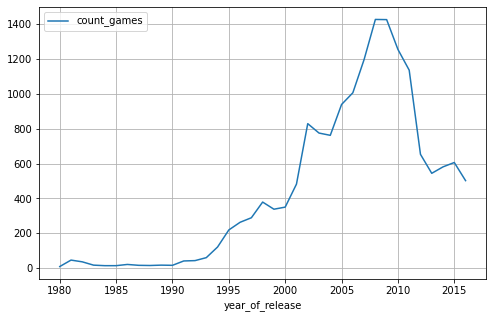

In [21]:
games_year = pd.pivot_table(games, index='year_of_release', values='sum_sales', aggfunc='count').reset_index()
games_year.columns = ['year_of_release', 'count_games']
games_year.plot(x='year_of_release', y='count_games', grid=True, figsize=(8, 5));

* Судя по графику, с 1980 по 1995 год игры почти не выпускались. В 1983 году индустрия видеоигр в Северной Америке пережила серьёзный «Крах» из-за ряда факторов, включая перенасыщенность рынка игровых консолей, началом конкуренции со стороны компьютерных игр и избытка чрезмерно раскрученных, некачественных игр. В течение нескольких лет произошло банкротство нескольких компаний, производящих компьютеры и игровые приставки. Индустрия домашних видеоигр начала восстанавливаться в 1985 году.


* В начале и середине 1990-х годов было выпущено множество популярных игр на консоли, включая новые франшизы. Индустрия домашних видеоигр начала восстанавливаться в 1995 году. Пик роста выпуска игр длился с 2001 по 2008 год, было выпущено множество видеоигр. Спад в 2008 году, может быть обусловлен появлением у большинства пользователей смартфонов и соответственно игр на них. Приставки стали менее популярны.

**Посмотрим как распределяются продажи игр на разных платформах.**

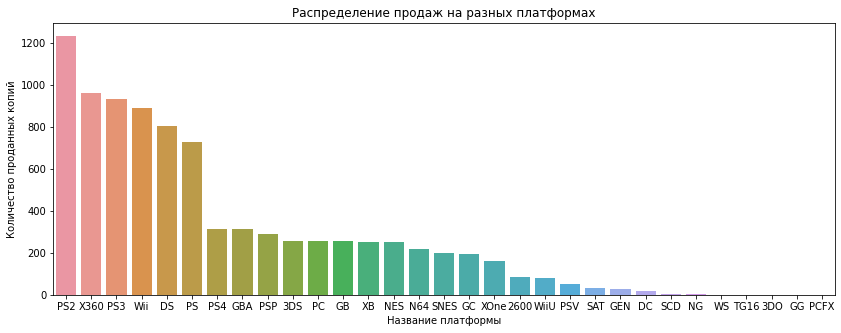

In [22]:
platform_sales = games.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).reset_index()
plt.figure(figsize=(14, 5))
sns.barplot(x=platform_sales['platform'], y=platform_sales['sum_sales'])
plt.title('Распределение продаж на разных платформах');
plt.xlabel('Название платформы');
plt.ylabel('Количество проданных копий');

* Лидеры по продажам - PlayStation 2, Xbox 360, PlayStation 3, Wii(Nintendo), DS(Nintendo), PlayStation. 


**Построим по этим платформам распределение по годам.**

In [23]:
# сохраним данные топ-6 платформ в отдельную таблицу.
current_platforms = platform_sales.head(6)

In [24]:
# Сохраним названия топ-6 в отдельную переменную.
top_platforms = current_platforms['platform'].unique()
top_platforms

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype=object)

**Напишем цикл для построения диаграмм распределения для топ-6 платформ.**

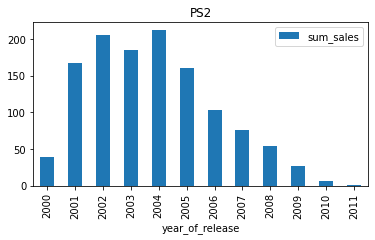

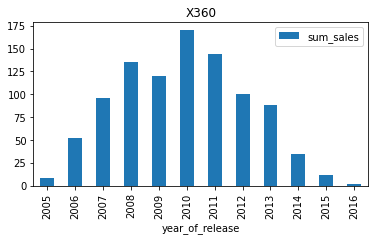

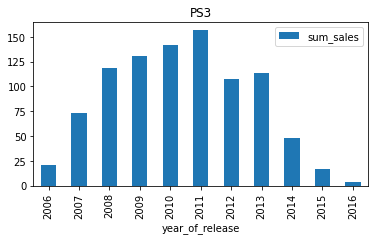

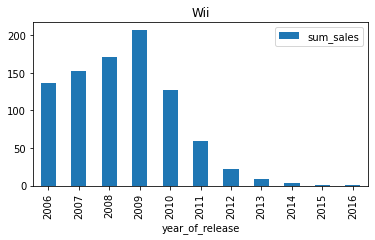

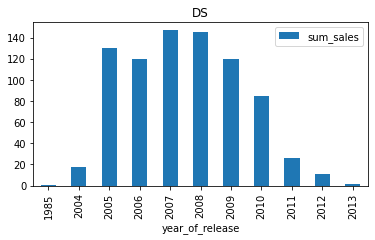

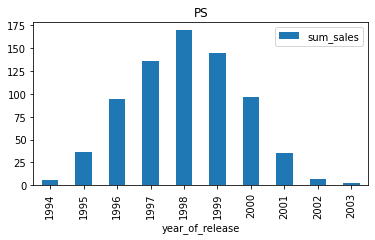

In [25]:
for platform in top_platforms:
    games[games['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(
        kind='bar', figsize=(6,3))
    plt.title(platform)

* По всем этим платформам к 2013 году уже продажи пошли на спад. В среднем игра живет 4-5 лет, так как появляются новые игры с лучшей графикой, появляются многопользовательские игры и т.п. Выберем актуальный период 2013 год и больше.

In [26]:
games_new = games.query('year_of_release >= 2013')

## Платформы-лидеры по продажам

**Посмотрим какие платформы лидируют по продажам. Выберем несколько потенциально прибыльных платформ.**

In [27]:
games_new_sales= games_new.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).reset_index().head(6)
games_new_sales

,platform,sum_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63


* Лидеры по продажам в актуальном периоде PlayStation 4, XOne, 3DS, PlayStation 3, Xbox 360, WiiU.

**Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам.**

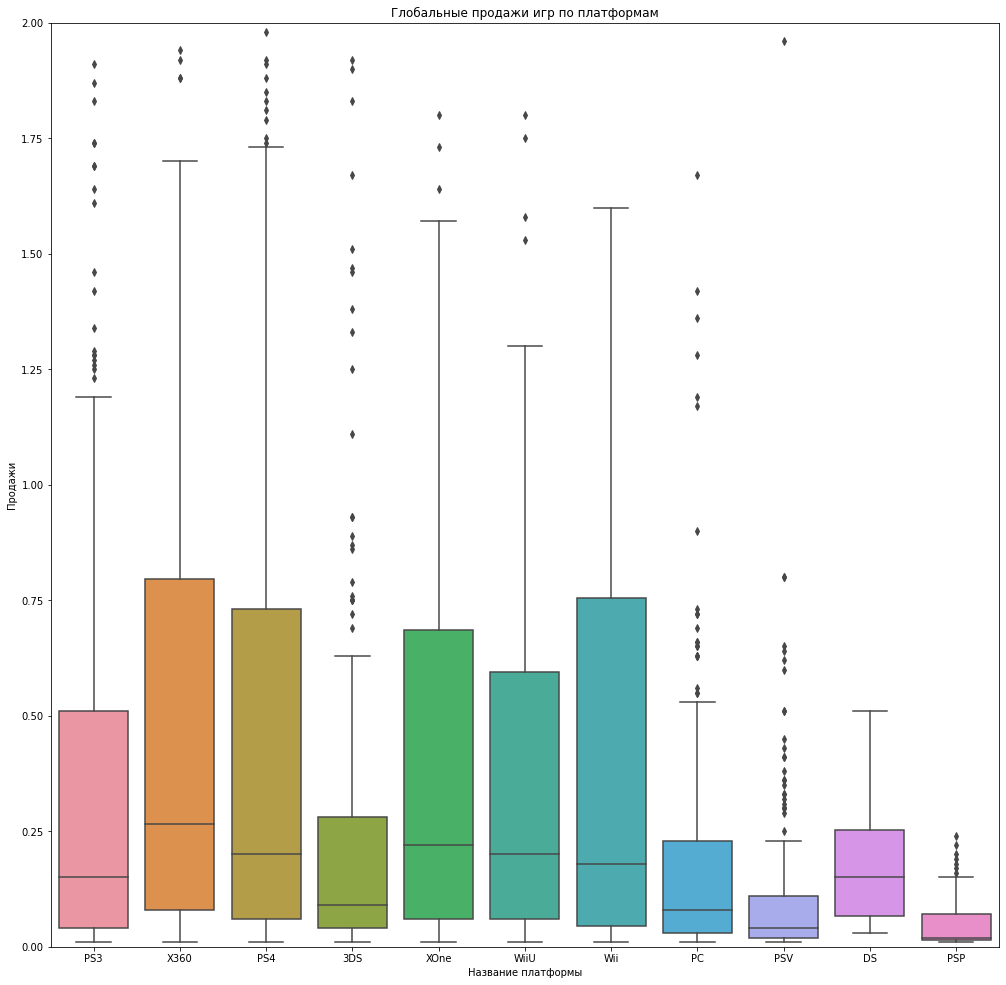

In [28]:
plt.figure(figsize=(17,17))
(sns.boxplot(data =games_new, y='sum_sales', x='platform')
    .set(title='Глобальные продажи игр по платформам', xlabel ='Название платформы', ylabel = 'Продажи', ylim=(0, 2)))
plt.show()

По диаграмме размаха видно, что есть существенные отличия в объеме продаж:

* Так у PS3 среднее значение продаж - 0,52 млн. проданных копий, медиана 0,15, максимальное число проданных копий 21,05 млн.

* У X360 среднее значение продаж - 0,73 млн. проданных копий, медиана 0,26, максимальное число проданных копий 16,27 млн.

* У PS4 среднее значение продаж - 0,80 млн. проданных копий, медиана 0,20, максимальное число проданных копий 14,63 млн и др.

* У каждой платформы выбросы.

Самые большие объёмы продаж у платформ - X360, PS4, XOne, WiiU.

## Влияние на продажи оценок пользователей и критиков.


**Посмотрим, как на продажи влияют оценки пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

**Посмотрим корреляцию по платформе PS4.**

In [29]:
# возьмём данные по платформе PlayStation 4 и отфильтруем значения -1, так как этим значением заполнены пропуски.
PS4 = games_new.query('platform == "PS4" and user_score != -1 and critic_score != -1')

Корреляция составляет: 0.40589480145836676


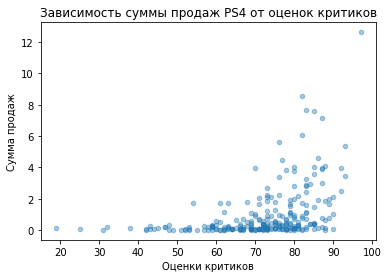

In [30]:
# Строим диаграмму рассеяния и считаем корреляцию по продажам и оценкам критиков
PS4.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.4);
plt.title('Зависимость суммы продаж PS4 от оценок критиков')
plt.xlabel('Оценки критиков');
plt.ylabel('Сумма продаж');
print('Корреляция составляет:', PS4['sum_sales'].corr(PS4['critic_score']))

* Зависимость продаж от оценки критиков слабая, но нельзя исключать тот факт, что на решение о покупке игры или просмотре фильма, мы всегда смотрим на оценку критиков.

Корреляция составляет: -0.033624975965288795


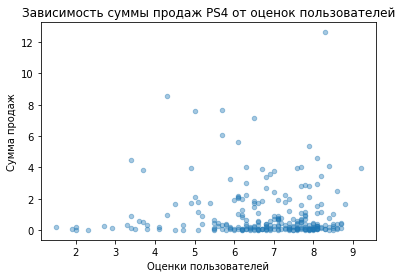

In [31]:
# Строим диаграмму рассеяния и считаем корреляцию по продажам и оценкам пользователей
PS4.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.4);
plt.title('Зависимость суммы продаж PS4 от оценок пользователей')
plt.xlabel('Оценки пользователей');
plt.ylabel('Сумма продаж');
print('Корреляция составляет:', PS4['sum_sales'].corr(PS4['user_score']))

* Зависимость продаж от оценки пользователей практически отсутствует.

**Посмотрим корреляцию по платформе 3DS.**

In [32]:
# возьмём данные по платформе 3DS и отфильтруем значения -1, так как этим значением заполнены пропуски.
DS3 = games_new.query('platform == "3DS" and user_score != -1 and critic_score != -1')

Корреляция составляет: 0.33923492878531464


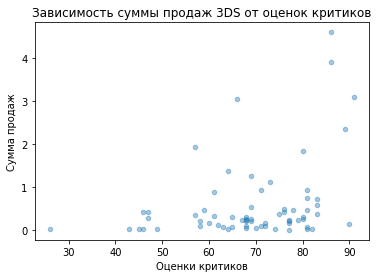

In [33]:
# Строим диаграмму рассеяния и считаем корреляцию по продажам и оценкам критиков
DS3.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.4);
plt.title('Зависимость суммы продаж 3DS от оценок критиков')
plt.xlabel('Оценки критиков');
plt.ylabel('Сумма продаж');
print('Корреляция составляет:', DS3['sum_sales'].corr(DS3['critic_score']))

Корреляция составляет: 0.2729904366942444


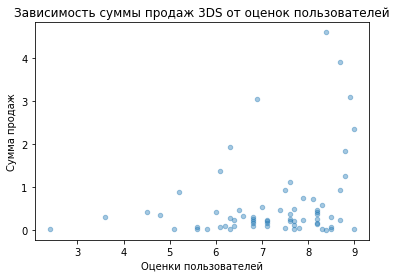

In [34]:
# Строим диаграмму рассеяния и считаем корреляцию по продажам и оценкам пользователей
DS3.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.4);
plt.title('Зависимость суммы продаж 3DS от оценок пользователей')
plt.xlabel('Оценки пользователей');
plt.ylabel('Сумма продаж');
print('Корреляция составляет:', DS3['sum_sales'].corr(DS3['user_score']))

* На платформе 3DS зависимость продаж от оценок критиков слабая, от оценок пользователей продажи почти не зависят.

**Посмотрим корреляцию и построим диаграмму рассеяния по платформе XOne.**

In [35]:
# возьмём данные по платформе XOne и отфильтруем значения -1, так как этим значением заполнены пропуски.
XOne = games_new.query('platform == "XOne" and user_score != -1 and critic_score != -1')

Корреляция составляет: 0.410422035612964


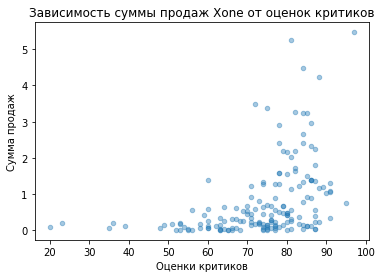

In [36]:
# Строим диаграмму рассеяния и считаем корреляцию по продажам и оценкам критиков
XOne.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.4);
plt.title('Зависимость суммы продаж Xone от оценок критиков')
plt.xlabel('Оценки критиков');
plt.ylabel('Сумма продаж');
print('Корреляция составляет:', XOne['sum_sales'].corr(XOne['critic_score']))

Корреляция составляет: -0.0940031832692086


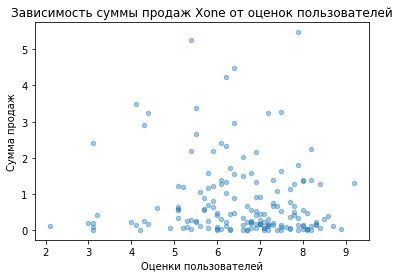

In [37]:
# Строим диаграмму рассеяния и считаем корреляцию по продажам и оценкам пользователей
XOne.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.4);
plt.title('Зависимость суммы продаж Xone от оценок пользователей')
plt.xlabel('Оценки пользователей');
plt.ylabel('Сумма продаж');
print('Корреляция составляет:', XOne['sum_sales'].corr(XOne['user_score']))

* На платформе XOne зависимость продаж от оценок критиков так же слабая, а от оценок пользователей продажи не зависят.

**Посмотрим корреляцию и построим диаграмму рассеяния по платформе PS3.**

In [38]:
# возьмём данные по платформе PS3 и отфильтруем значения -1, так как этим значением заполнены пропуски.
PS3 = games_new.query('platform == "PS3" and user_score != -1 and critic_score != -1')

Корреляция составляет: 0.3338066356506173


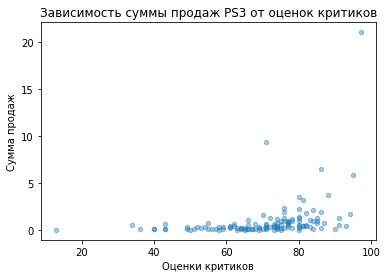

In [39]:
# Строим диаграмму рассеяния и считаем корреляцию по продажам и оценкам критиков
PS3.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.4);
plt.title('Зависимость суммы продаж PS3 от оценок критиков')
plt.xlabel('Оценки критиков');
plt.ylabel('Сумма продаж');
print('Корреляция составляет:', PS3['sum_sales'].corr(PS3['critic_score']))

Корреляция составляет: 0.02269094327112414


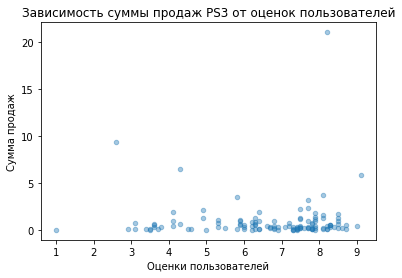

In [40]:
# Строим диаграмму рассеяния и считаем корреляцию по продажам и оценкам пользователей
PS3.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.4);
plt.title('Зависимость суммы продаж PS3 от оценок пользователей')
plt.xlabel('Оценки пользователей');
plt.ylabel('Сумма продаж');
print('Корреляция составляет:', PS3['sum_sales'].corr(PS3['user_score']))

* На платформе PS3 зависимость продаж от оценок критиков слабая, а от оценок пользователей продажи не зависят.

**Посмотрим корреляцию и построим диаграмму рассеяния по платформе X360.**

In [41]:
# возьмём данные по платформе X360 отфильтруем значения -1, так как этим значением заполнены пропуски.
X360 = games_new.query('platform == "X360" and user_score != -1 and critic_score != -1')

Корреляция составляет: 0.3503445460228664


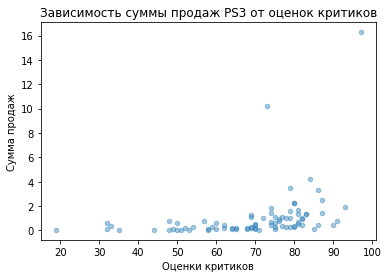

In [42]:
# Строим диаграмму рассеяния и считаем корреляцию по продажам и оценкам критиков
X360.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.4);
plt.title('Зависимость суммы продаж PS3 от оценок критиков')
plt.xlabel('Оценки критиков');
plt.ylabel('Сумма продаж');
print('Корреляция составляет:', X360['sum_sales'].corr(X360['critic_score']))

Корреляция составляет: -0.006238179532306317


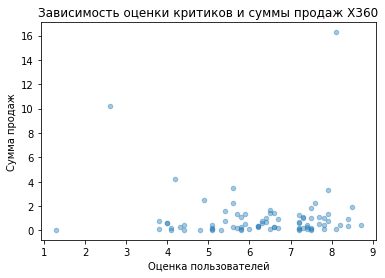

In [43]:
# Строим диаграмму рассеяния и считаем корреляцию по продажам и оценкам пользователей
X360.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.4);
plt.title('Зависимость оценки критиков и суммы продаж X360')
plt.xlabel('Оценка пользователей');
plt.ylabel('Сумма продаж');
print('Корреляция составляет:', X360['sum_sales'].corr(X360['user_score']))

* Есть слабая зависимость продаж от оценок критиков на платформе PS3, а от оценок пользователей продажи не зависят.

**На основе проведенного исследования корреляции по нескольким платформам можно сделать общий вывод, что на суммарные продажи игр, отзывы пользователей не влияют, связь отсутствует. Оценка критиков имеет немного большее влияние, но тоже очень слабое.**

## Распределение игр по жанрам.

**Посмотрим на общее распределение игр по жанрам, посчитаем медианные продажи.**

In [44]:
genre_games_median = games_new.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False).reset_index()
genre_games_median

,genre,sum_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


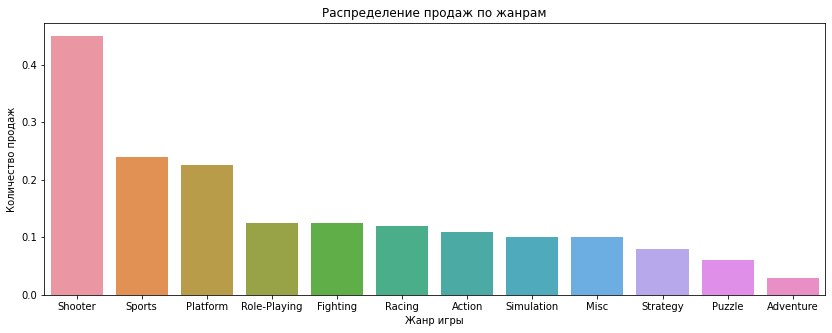

In [45]:
plt.figure(figsize=(14, 5))
sns.barplot(x=genre_games_median['genre'], y=genre_games_median['sum_sales'])
plt.title('Распределение продаж по жанрам');
plt.xlabel('Жанр игры');
plt.ylabel('Количество продаж');

* Согласно распределению, большой популярностью среди геймеров пользуется жанр Shooter - шутеры позволяют игрокам использовать в своих действиях оружие, обычно с целью уничтожить врагов или противоборствующих игроков. 


* На втором месте находтся Sports - это видеоигра, которая имитирует занятия спортом. Большинство видов спорта были воссозданы с помощью игры, включая командные виды спорта, легкую атлетику, экстремальные виды спорта и единоборства.


* Третье место занимает жанр Platform - это игра в которой основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня.


Самые не популярные жанры Puzzle(головоломки) и Adventure(приключение).

**Построим диаграмму размаха по жанрам и продажам.**

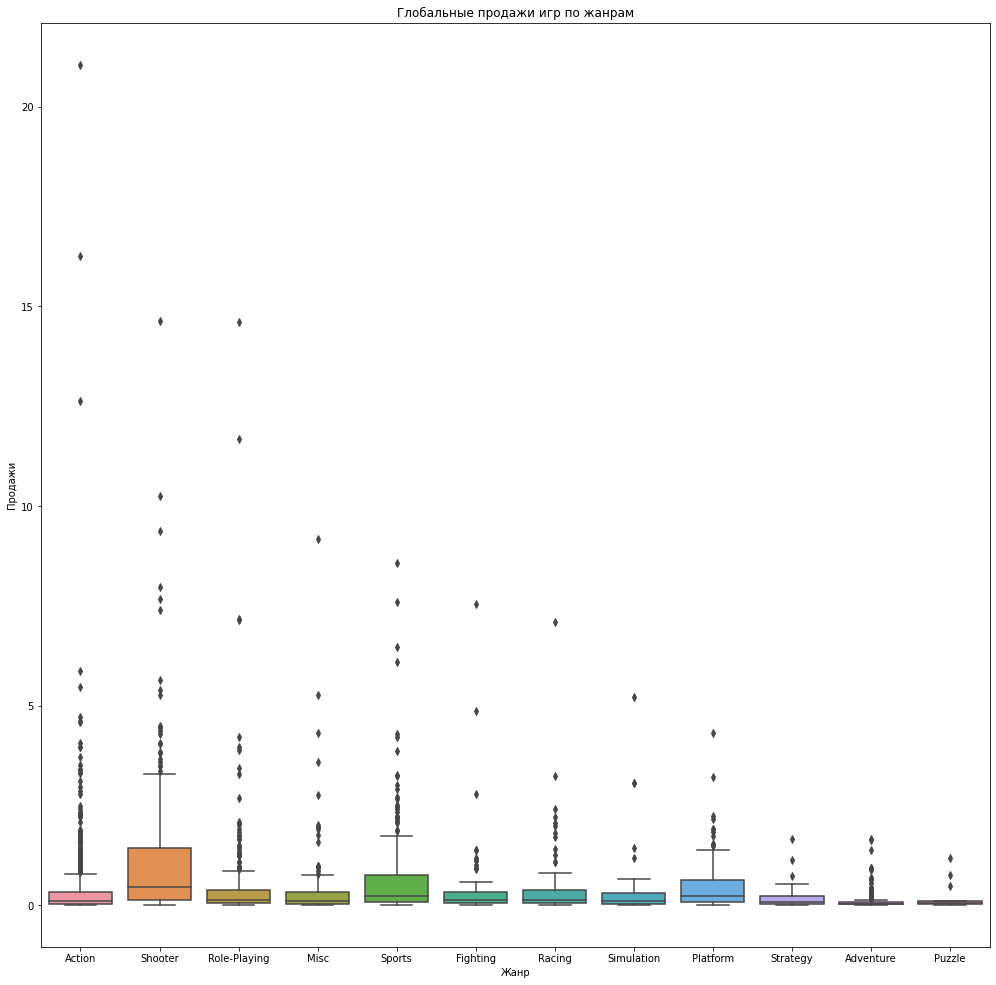

In [46]:
plt.figure(figsize=(17,17));
(sns.boxplot(data =games_new, y='sum_sales', x='genre')
    .set(title='Глобальные продажи игр по жанрам', xlabel ='Жанр', ylabel = 'Продажи'));
plt.show();

По диаграмме размаха видно, что есть отличия в объеме продаж:

* Так у жанра Shooter среднее значение продаж - 1.24 млн. проданных копий, медиана 0,45, максимальное число проданных копий 14.63 млн.

* У жанра Sports среднее значение продаж - 0.7 млн. проданных копий, медиана 0,24, максимальное число проданных копий 8.58 млн.

* У Platform среднее значение продаж - 0.57 млн. проданных копий, медиана 0.22, максимальное число проданных копий 4.32 млн.

* У каждого жанра много выбросы.

Самые большие объёмы продаж у игр жанра - Shooter, Sports, Platform.

# Портрет пользователя.


## Портрет пользователя каждого региона.


**Для начала определим топ-5 самых популярных платформ в Северной Америке.**

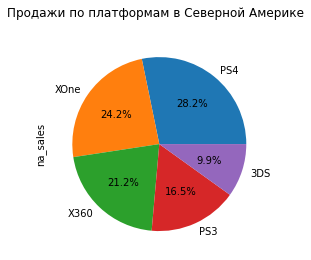

In [47]:
games_new.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(4,4), legend=False, title='Продажи по платформам в Северной Америке');
plt.show();

* Самые популярные игровые платформы в Северной Америке - это PS4, XOne, X360, PS3, 3DS.

**Определим топ-5 платформ в Европе.**

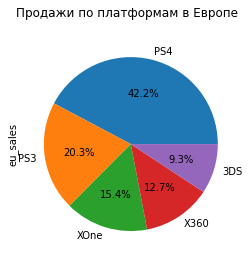

In [48]:
games_new.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='pie', legend=False, autopct='%1.1f%%', subplots=True, figsize=(4,4), title='Продажи по платформам в Европе');
plt.show();

* В Европе популярностью пользуются платформы - PS4, PS3, XOne, X360, 3DS.

**Определим топ-5 популярных платформ в Японии.**

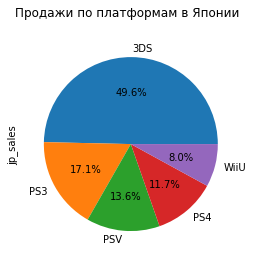

In [49]:
games_new.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', legend=False, autopct='%1.1f%%', subplots=True, figsize=(4,4), title='Продажи по платформам в Японии');
plt.show();

* В Японии популярны - 3DS, PS3, PSV, PS4, WiiU.

**И определим какие платформы популярны в других регионах.**

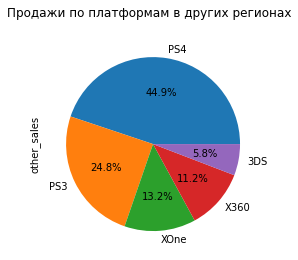

In [50]:
games_new.groupby('platform').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False).head(5).plot(kind='pie', legend=False, autopct='%1.1f%%', subplots=True, figsize=(4,4), title='Продажи по платформам в других регионах');
plt.show();

**В других регионах популярны - PS4, Ps3, XOne, X360, 3DS.**

## Топ - 5 жанров для каждого региона.

**Теперь определим для пользователя каждого региона топ-5 популярныех жанров.**


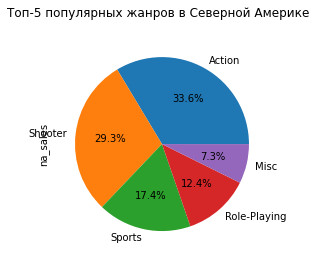

In [51]:
# для Северной Америки
games_new.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(4,4), legend=False, title='Топ-5 популярных жанров в Северной Америке');
plt.show();

* В Северной Америке популярны - Action, Shooter, Sports, Role-Playing, Misc(аркада).

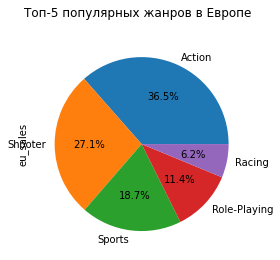

In [52]:
# для Европы
games_new.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(4,4), legend=False, title='Топ-5 популярных жанров в Европе');
plt.show();

* В Европе популярны такие жанры как - Action, Shooter, Sports, Role-Playing, Racing(гоночная игра).

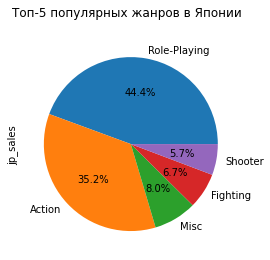

In [53]:
# для Японии
games_new.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(4,4), legend=False, title='Топ-5 популярных жанров в Японии');
plt.show();

* В Японии популярны жанры - Role-Playing, Action, Misc, Fighting(от англ. Fighting — бой, драка, поединок, борьба), Shooter.

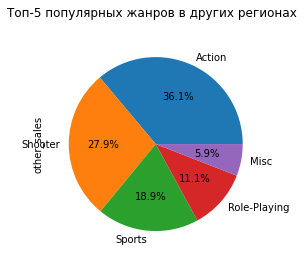

In [54]:
# для остальных регионов
games_new.groupby('genre').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(4,4), legend=False, title='Топ-5 популярных жанров в других регионах');
plt.show();

* В остальных регионах популярны такие жанры как -  Action, Shooter, Sports, Role-Playing, Misc.

**Выводы:**
* В Северной Америке и Европе популярные жанры схожи - это экшены, спортивные игры, и шутеры. В Северной Америке больше играют в аркады, а в Европе в гонки.


* В Японии популярны совершенно другие жанры - на первом месте ролевые игры, причем с большим отрывом, на втором месте экшены и аркады.

* Пользователи других регионов предпочитают - экшены, шутеры и спортивные игры. 

## Влияние рейтинга ESRB на прожажи.

**Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе.**

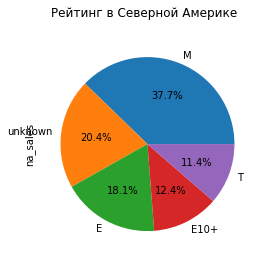

In [55]:
# в Северной Америке
games_new.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(4,4), legend=False, title='Рейтинг в Северной Америке');
plt.show();

**Доля продаж по рейтингу в Северной Америке:**

* `M` - для взрослых старше 17 лет - 37,7% продаж;

* `unknown` - рейтинг неизвестен 20,4%;

* `E` - для всех старше 6 лет - 18,1% продаж;

* `Е10+` - для всех старше 10 лет - 12.4% продаж.

* `T`- подросткам от 13 лет - 11.4%.

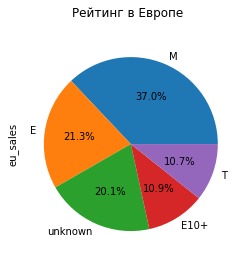

In [56]:
# в Европе
games_new.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(4,4), legend=False, title='Рейтинг в Европе');
plt.show();

**Доля продаж по рейтингу в Европе:**

* `M` - для взрослых старше 17 лет - 37% продаж;

* `E` - для всех старше 6 лет - 21.3% продаж;

* `unknown` - рейтинг неизвестен 20,1%;

* `Е10+` - для всех старше 10 лет - 10.9% продаж;

* `T`- подросткам от 13 лет - 10.7%.

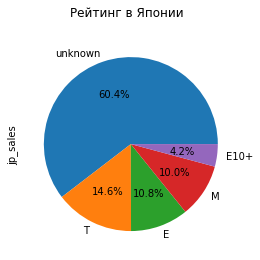

In [57]:
# для Японии
games_new.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(4,4), legend=False, title='Рейтинг в Японии');
plt.show();

**Доля продаж по рейтингу в Японии:**

* `unknown` - рейтинг неизвестен 60,4%;

* `T`- подросткам от 13 лет - 14.6%;

* `E` - для всех старше 6 лет - 10.8% продаж;

* `M` - для взрослых старше 17 лет - 10% продаж;

* `Е10+` - для всех старше 10 лет - 4.2% продаж.

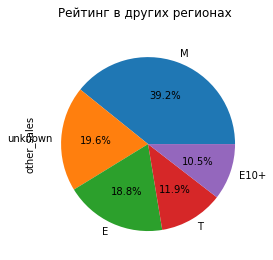

In [58]:
# для остальных регионов 
games_new.groupby('rating').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False).plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(4,4), legend=False, title='Рейтинг в других регионах');
plt.show();

**Доля продаж по рейтингу в других регионах:**

* `M` - для взрослых старше 17 лет - 39.2% продаж;

* `unknown` - рейтинг неизвестен - 19,6%;

* `E` - для всех старше 6 лет - 18.8% продаж;

* `T`- подросткам от 13 лет - 11,9% ;

* `Е10+` - для всех старше 10 лет - 10.5% продаж.


Можно сделать вывод, что рейтинг ESRB влияет на количество продаж в разных регионах, так большую долю продаж в Северной Америке, Европе и других регионах занимают игры категории `M` - для взрослых старше 17 лет, а в Японии лидерами продаж являются игры без рейтинга, это может быть связано с тем, что ESRB - это рейтинг для США и Канады, в Японии возрастной рейтинг присваивает CERO, а этих данных в нашем датасете нет. 

# Проверка гипотез.

**Проверим первую гипотезу:**

Она звучит так: "Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые."

Сформулируем нулевую и альтернативную гипотезы.

H₀ - Средние пользовательские рейтинги платформ Xbox One и PC равны.

H₁ - Средние пользовательские рейтинги платформ Xbox One и PC не равны.


Критический уровень статистической значимости установим 0.05

* Выделим в отдельные таблицы данные платформ Xbox One и PC.

In [59]:
# Сделаем срез данных по двум платформам и отфильтруем значение -1, так как этим значением мы заполняли пропуски.
xone_user_score = games_new.query('platform == "XOne" and user_score != -1')
pc_user_score = games_new.query('platform == "PC" and user_score != -1')

In [60]:
alpha = 0.05

results = st.ttest_ind(
    xone_user_score['user_score'],
    pc_user_score['user_score'],
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One -', round(xone_user_score['user_score'].mean(), 1))
print('Cредний пользовательский рейтинг платформы PC -', round(pc_user_score['user_score'].mean(), 1))

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One - 6.5
Cредний пользовательский рейтинг платформы PC - 6.3


**Проверим вторую гипотезу:**

Она звучит так: "Средние пользовательские рейтинги жанров Action и Sports разные."

Сформулируем нулевую и альтернативную гипотезы.

H₀ - Средние пользовательские рейтинги жанров Action и Sports равны.

H₁ - Средние пользовательские рейтинги жанров Action и Sports не равны.

Критический уровень статистической значимости установим 0.05

* Выделим в отдельные таблицы данные жанров Acnion и Sports.

In [61]:
# Сделаем срез данных по двум жанрам и отфильтруем значение -1, так как этим значением мы заполняли пропуски.
action = games_new.query('genre == "Action" and user_score != -1')
sports = games_new.query('genre == "Sports" and user_score != -1')

In [62]:
alpha = 0.05

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг жанра Action -', round(action['user_score'].mean(), 1))
print('Cредний пользовательский рейтинг жанра Sports -', round(sports['user_score'].mean(), 1))

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг жанра Action - 6.8
Cредний пользовательский рейтинг жанра Sports - 5.2


**Вывод:**

* Первая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны не подтвердилась, рейтинг Xbox one больше рейтинга платформы PC.


* Вторая  о том, что средние пользовательские рейтинги жанров Action и Sports разные подтвердилась, рейтинг игр жанра Action - 6.8, а Sports - 5.2.


# Общий вывод.

Перед исследовательским анализом, данные были подготовлены, значения столбцов приведены к нужным типам, удалены и заполнены пропуски, где это было возможно, обработаны дубликаты.


Исследовательский анализ данных показал, что количество выпускаемых игр для игровых приставок и для персонального компьютера начало расти с 1995 года до 2008 года. Спад в 2008 году, скорее всего обусловлен появлением у большинства пользователей смартфонов и соответственно игр на них, выпуск мобильных приложений. Приставки стали менее популярны. 


Самые популярные приставки, лидеры продаж  - PlayStation 2, Xbox 360, PlayStation 3, Wii(Nintendo), DS(Nintendo), PlayStation. 

Согласно данным в разных регионах популярны разные платформы:

* В Северной Америке популярны - PS4, XOne, X360, PS3, 3DS.

* В Европе - PS4, PS3, XOne, X360, 3DS.

* В Японии - 3DS, PS3, PSV, PS4, WiiU. 

Пик полулярности платформы в среднем составляет 4-5 лет, а срок жизни около 10 лет.


Исследовали взаимосвязь продаж от оценок пользователей и критиков, было выявлено, что оценки критиков и пользователей слабо взаимосвязаны с продажами. Оценки критиков имеют небольшое влияние на продажи, тогда как оценки пользователей не влияют совсем.


Самые популярные жанры игр, согласно медианным продажам это Shooter, Sports, Platform самые не популярные - Puzzle(головоломки), Adventure(приключения).


Так же были проанализированы популярные жанры в разных регионах:

* В Северной Америке популярны жанры - Action, Shooter, Sports, Role-Playing, Misc(аркада).

* В Европе популярны жанры - Action, Shooter, Sports, Role-Playing, Racing(гоночная игра).

* В Японии - Role-Playing, Action, Misc, Fighting(от англ. Fighting — бой, драка, поединок, борьба), Shooter.

Популярность и продажи игры зависят от возрастного рейтинга:

* В Северной Америке доля продаж 37,7% принадлежит играм категории `M` - для взрослых старше 17 лет.

* В Европе так же 37% принадлежит категории `M` - для взрослых старше 17 лет.

* В Японии большая доля продаж 60,4% приходится на категорию  игр без рейтинга.

* В остальных регионах 39,2% принадлежит играм категории `M` - для взрослых старше 17 лет.

Так же проверили гипотезы и получили следующие результаты: 

* Первая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны не подтвердилась, рейтинг Xbox one больше рейтинга платформы PC.


* Вторая  о том, что средние пользовательские рейтинги жанров Action и Sports разные подтвердилась, рейтинг игр жанра Action - 6.8, а Sports - 5.2.

Основная цель проекта выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для получения большей прибыли лучше всего продавать игры для таких приставок как PS4, Xbox 360, 3DS, в жанре Shooter, Sports, Platform, Action. Выбирать игры предпочтительно с возрастной категорией `M` - старше 17 лет, для в Японии данных недостаточно, так как там возрастной рейтинг присваивает компания CERO, а в нашем распоряжении данные только о рейтинге присвоенном компанией ESRB. Рекламные кампании, выбор платформы, жанра и рейтинга лучше проводить согласно региону, так как есть значительные отличия.